##  Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')

##  Importing Data

In [2]:
df= pd.read_csv('Fraud_check.csv')
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [3]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:600
No. of features:6


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
df.describe(include='all')

Undergrad Marital.Status  Taxable.Income  City.Population  \
count        600            600      600.000000       600.000000   
unique         2              3             NaN              NaN   
top          YES         Single             NaN              NaN   
freq         312            217             NaN              NaN   
mean         NaN            NaN    55208.375000    108747.368333   
std          NaN            NaN    26204.827597     49850.075134   
min          NaN            NaN    10003.000000     25779.000000   
25%          NaN            NaN    32871.500000     66966.750000   
50%          NaN            NaN    55074.500000    106493.500000   
75%          NaN            NaN    78611.750000    150114.250000   
max          NaN            NaN    99619.000000    199778.000000   

        Work.Experience Urban  
count        600.000000   600  
unique              NaN     2  
top                 NaN   YES  
freq                NaN   302  
mean          15.558333   NaN  
std            8.842147   NaN  
min            0.000000   NaN  
25%            8.000000   NaN  
50%           15.000000   NaN  
75%           24.000000   NaN  
max           30.000000   NaN

<Axes: >

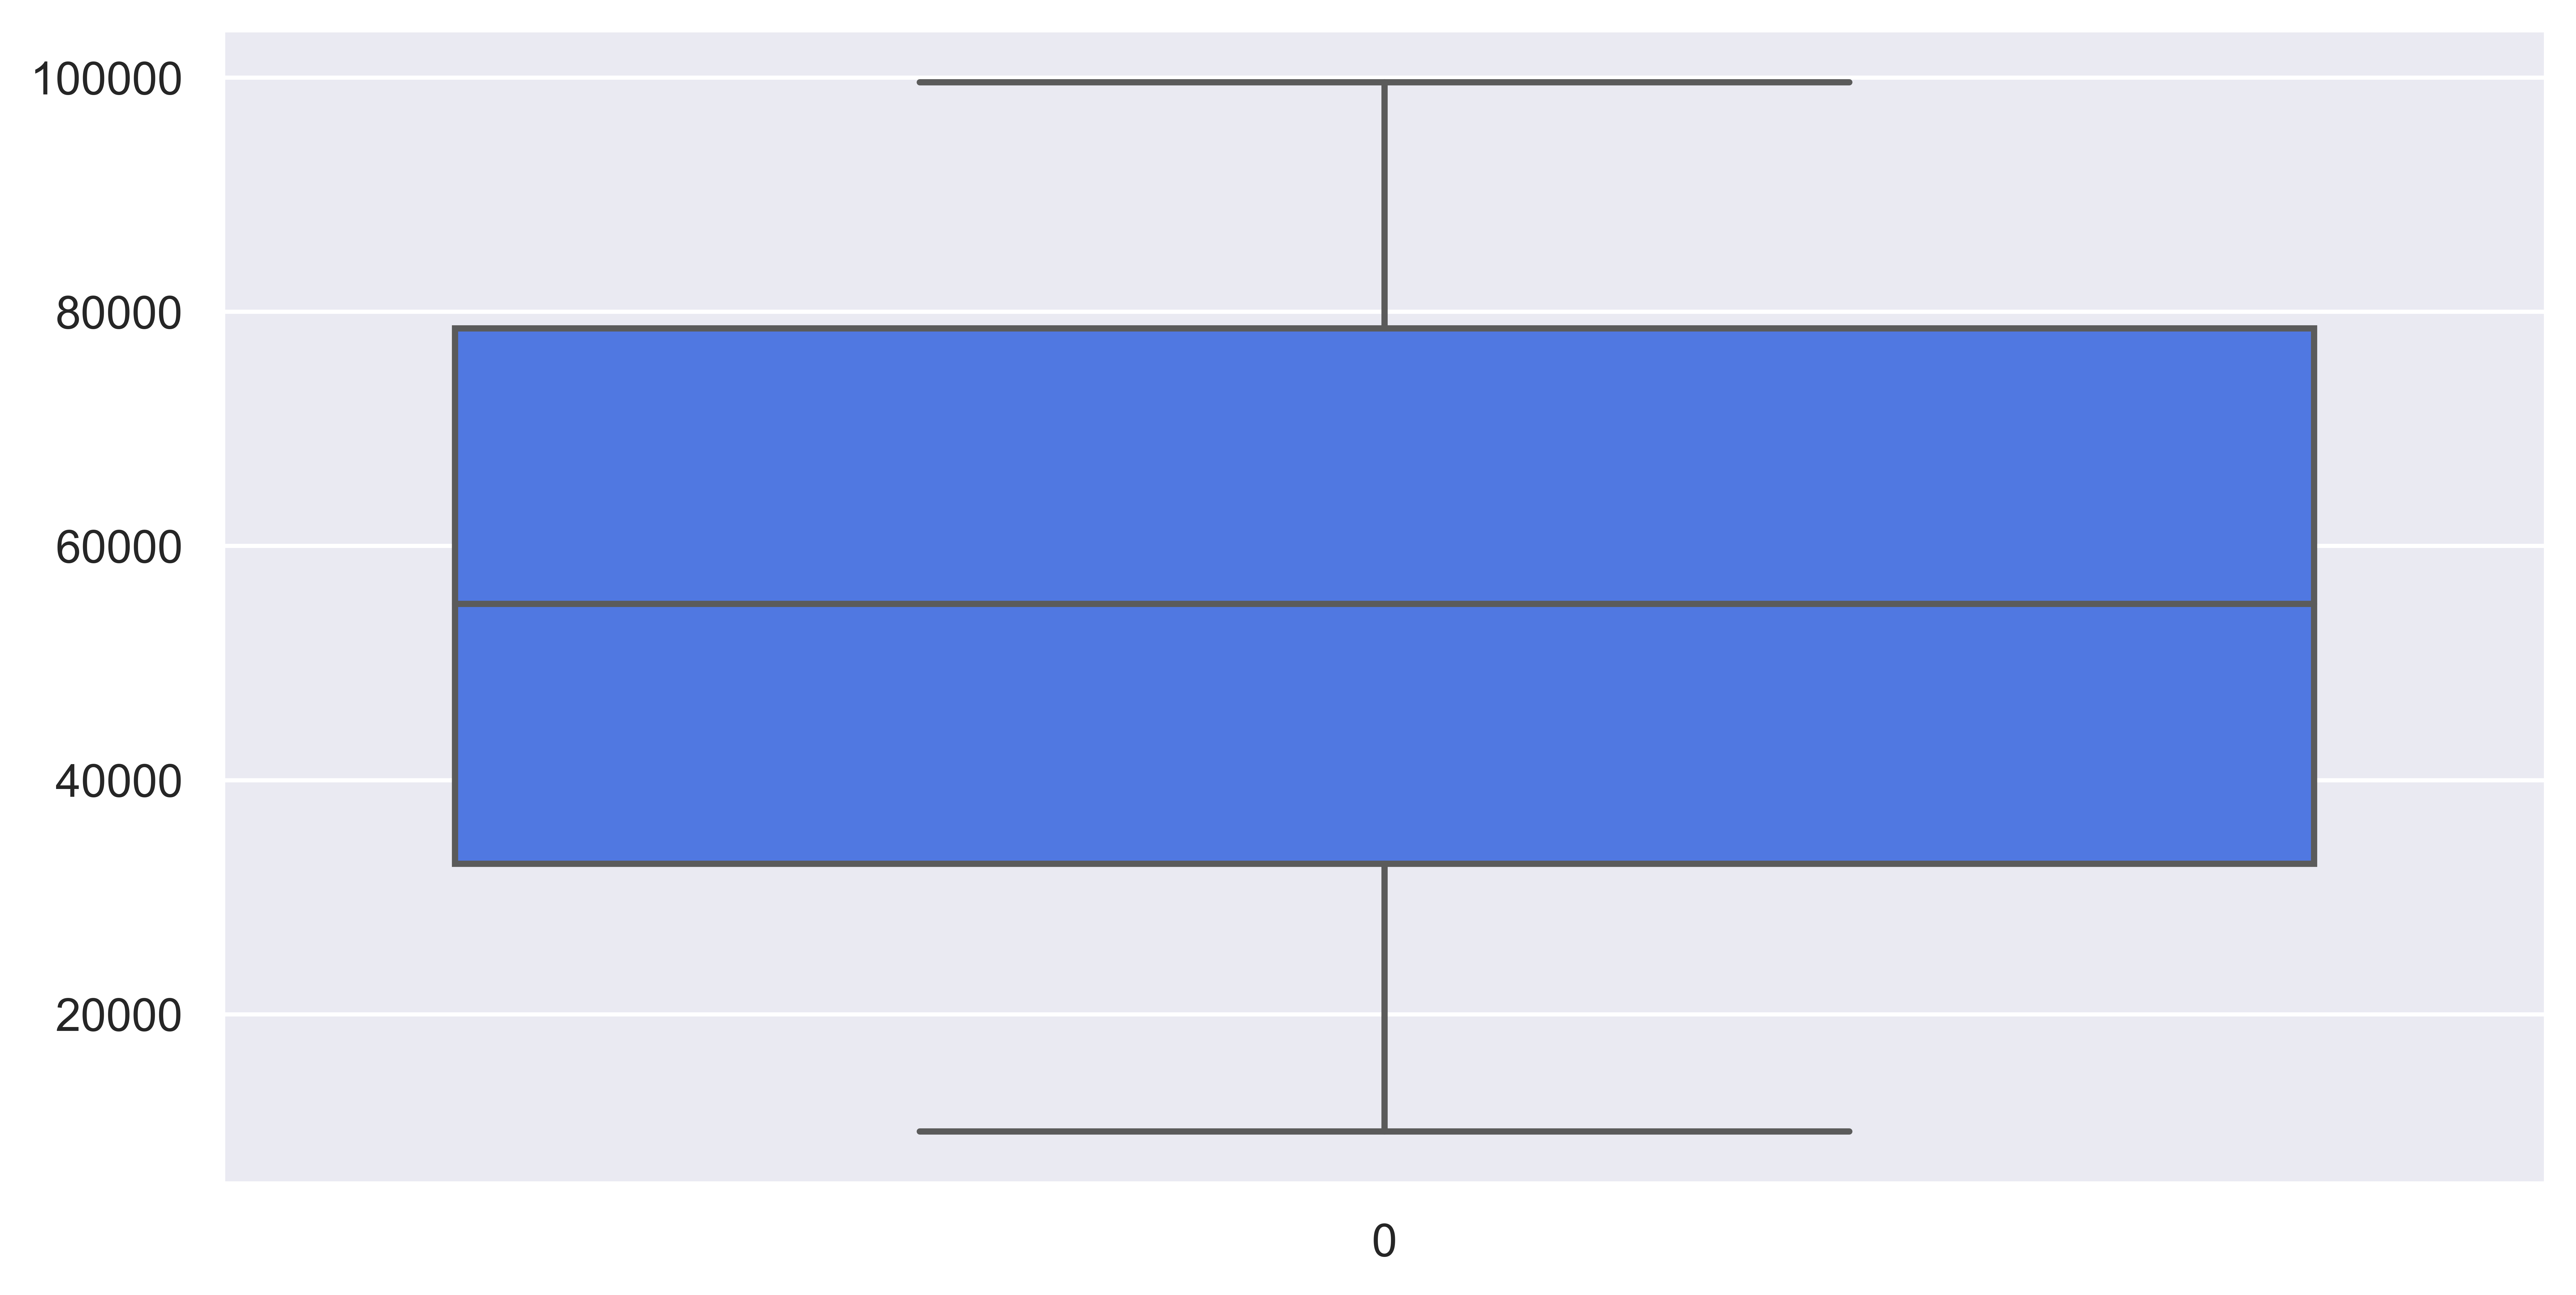

In [7]:
sns.boxplot(df['Taxable.Income'])

#### There are no outliers in the data

In [8]:
df1= df.copy()
df1.head(5)

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [9]:
df1= pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [10]:
corr= df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<Axes: >

In [11]:
# Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [12]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [13]:
df1.head()

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0           good            50047               10             1   
1           good           134075               18             0   
2           good           160205               30             1   
3           good           193264               15             0   
4           good            27533               28             1   

   Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0              0                        0                       0   
1              1                        1                       0   
2              0                        0                       1   
3              1                        0                       0   
4              0                        0                       1   

   Marital.Status_Single  Urban_NO  Urban_YES  
0                      1         0          1  
1                      0         0          1  
2                      0         0          1  
3                      1         0          1  
4                      0         1          0

##  Model Building

In [14]:
x= df1.iloc[:,1:10]
y= df1['Taxable.Income']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=1)

In [16]:
y_train.value_counts()

good     379
risky    101
Name: Taxable.Income, dtype: int64

In [17]:
model= RandomForestClassifier() 
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [18]:
ypred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risky', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',

In [19]:
accuracy_score(ypred,y_test)

0.75

In [20]:
confusion_matrix(ypred,y_test)

array([[90, 23],
       [ 7,  0]], dtype=int64)

In [21]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        good       0.80      0.93      0.86        97
       risky       0.00      0.00      0.00        23

    accuracy                           0.75       120
   macro avg       0.40      0.46      0.43       120
weighted avg       0.64      0.75      0.69       120



In [22]:
print('Training Accuracy : ',model.score(x_train,y_train))
print('Testing Accuracy : ',model.score(x_test,y_test))

Training Accuracy :  1.0
Testing Accuracy :  0.75


In [23]:
len(model.estimators_)

100

In [24]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1870123580)

In [25]:
x.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [26]:
df1['Taxable.Income'].unique()

['good', 'risky']
Categories (2, object): ['risky' < 'good']

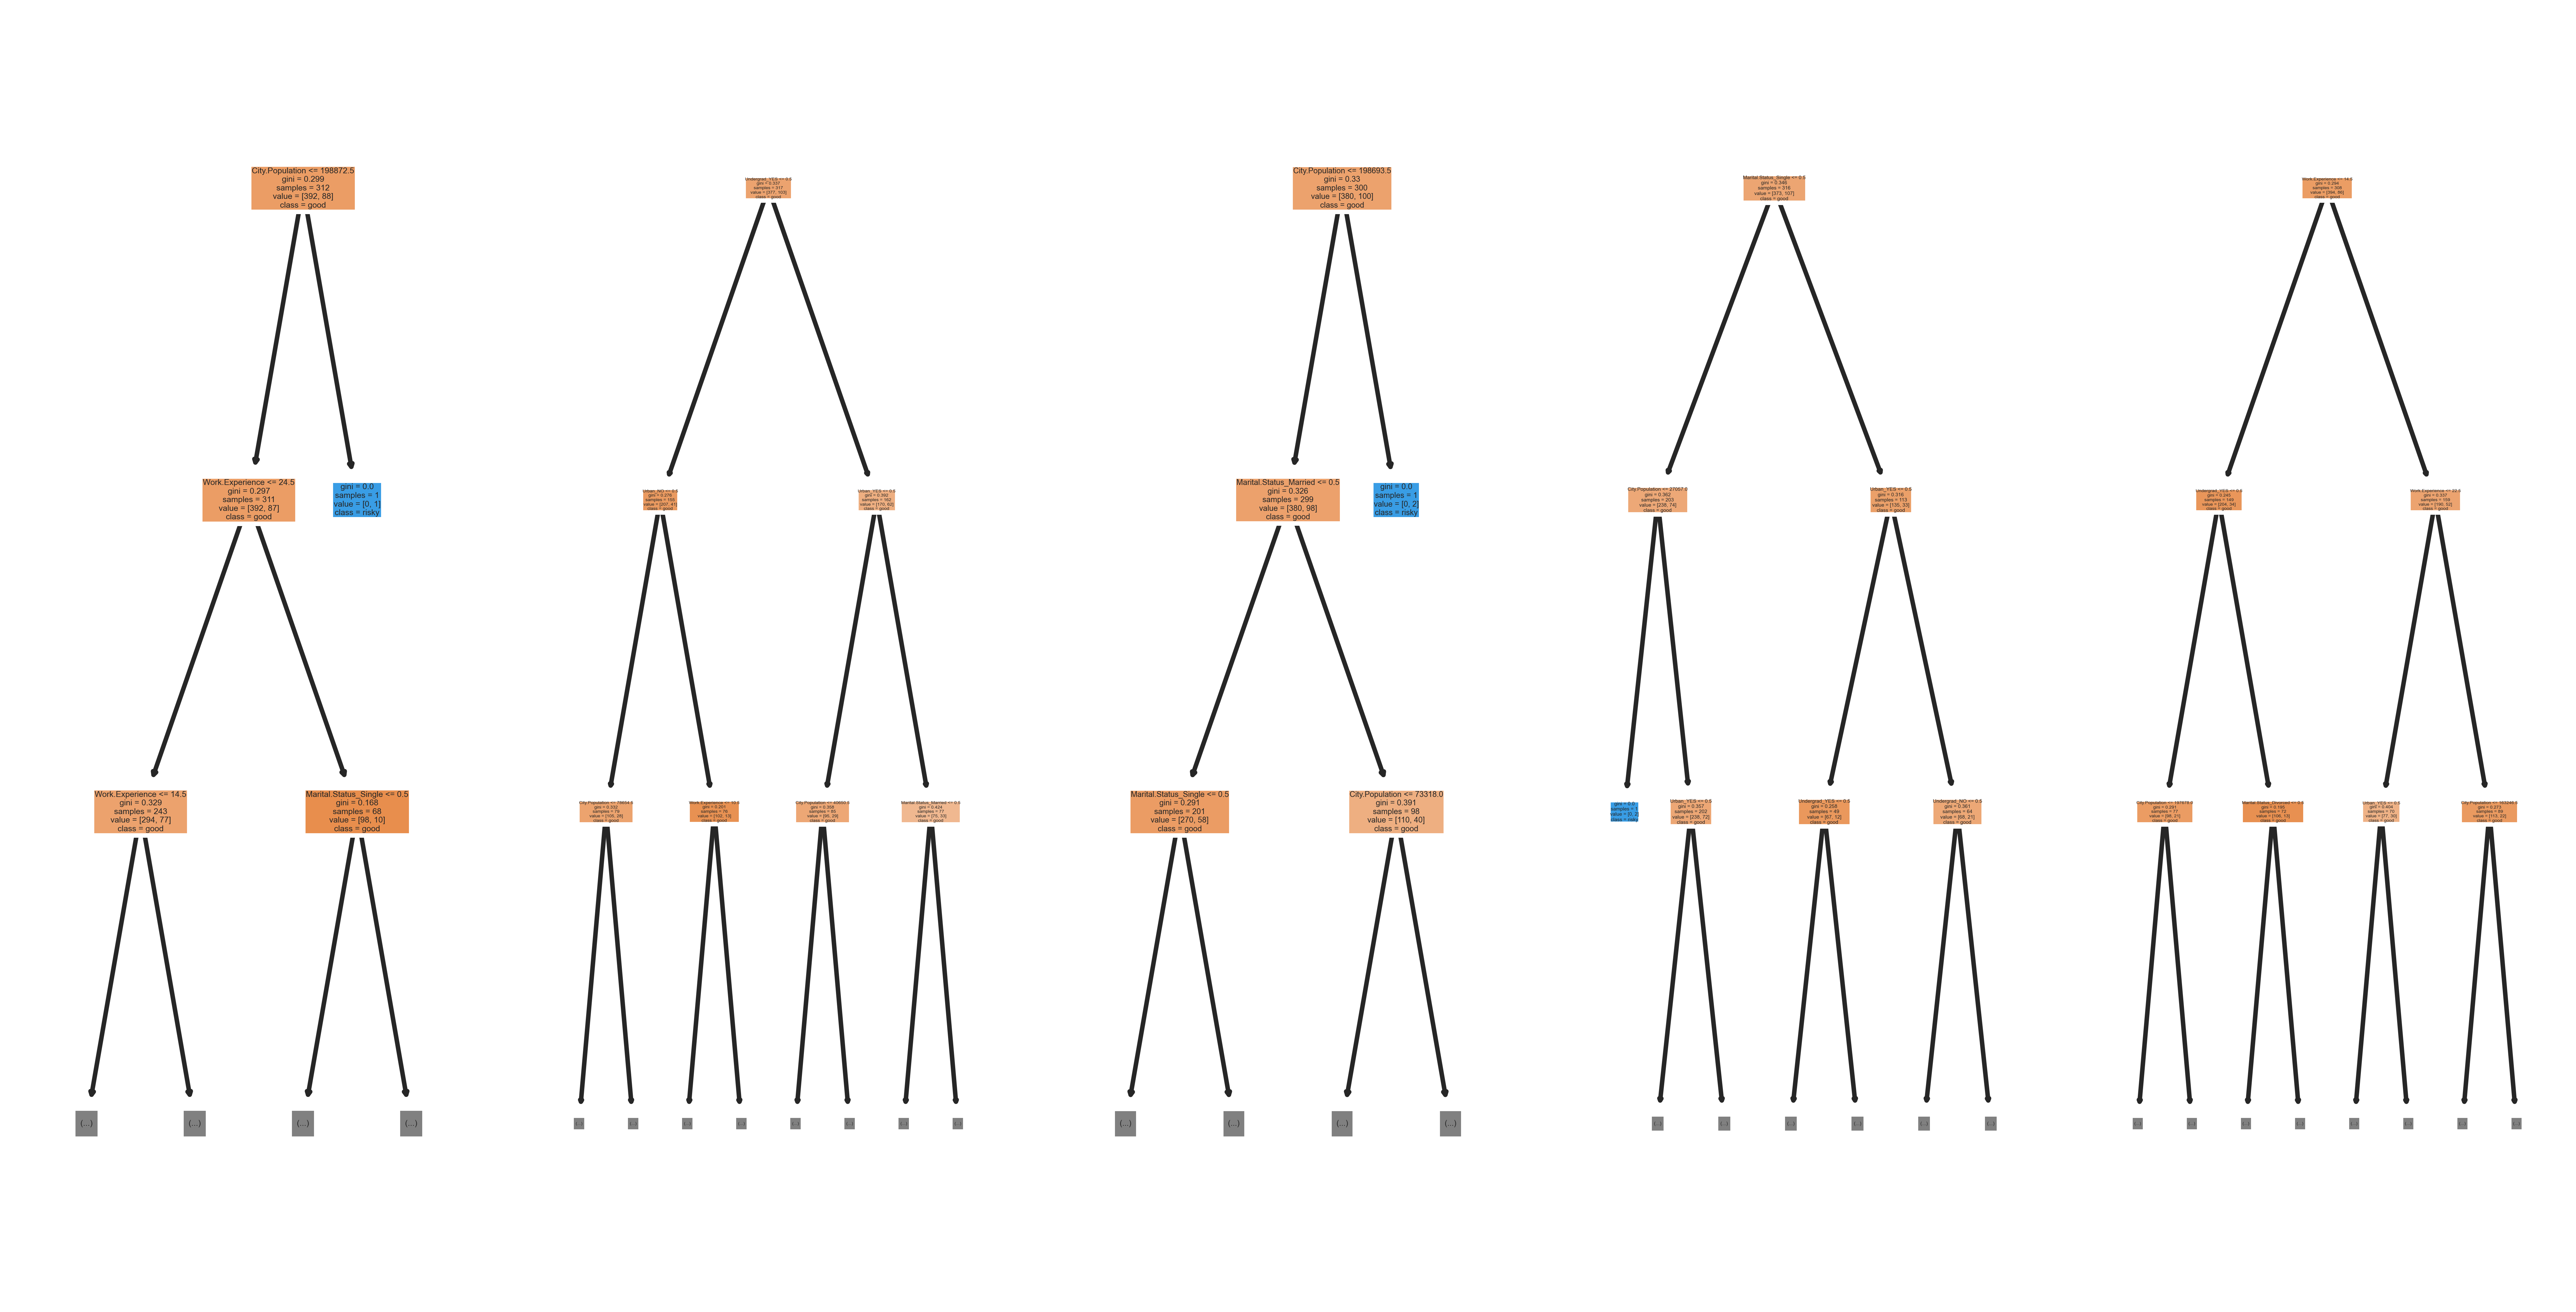

In [27]:
fig,ax = plt.subplots(1,5)

for i in range(0,5):
    tree.plot_tree(model.estimators_[i],
                  feature_names=list(x.columns),
                  class_names=list(df1['Taxable.Income'].unique()),
                  filled=True,
                   max_depth=2,
                  ax  = ax[i])

##  Conclusion
         We got the Accuracy on testing data as 74%
